In [3]:
path = "/Users/mac/Documents/PyProject/Computer Vision/AI Specialist Support 04 (Vision)"
import os
os.chdir(path)
%pwd

'/Users/mac/Documents/PyProject/Computer Vision/AI Specialist Support 04 (Vision)'

In [4]:
os.listdir()

['Bản sao của VGG16 02.png',
 'Bản sao của Resnet.png',
 'Bản sao của VGG16 03.png',
 'Object_Classification_2.h5',
 'Bản sao của VGG16.png',
 'Bản sao của Resnet 03.png',
 'Bản sao của Resnet 02.png',
 'VGG16 03.png',
 'VGG16 02.png',
 'Object Dataset 2.rar',
 'Resnet 03.png',
 'Object Dataset 1.rar',
 'Resnet 02.png',
 '.ipynb_checkpoints',
 'Bản sao của Transfer Learning.png',
 'Resnet.png',
 'VGG16.png',
 'Support4.ipynb',
 'Transfer Learning.png',
 'Object_Classification_1.h5']

In [10]:
# install patool để giải nén file
from pyunpack import Archive
Archive('Object Dataset 1.rar').extractall("/Users/mac/Documents/PyProject/Computer Vision/AI Specialist Support 04 (Vision)")
Archive('Object Dataset 2.rar').extractall("/Users/mac/Documents/PyProject/Computer Vision/AI Specialist Support 04 (Vision)")

PatoolError: patool can not unpack
patool error: error extracting /Users/mac/Documents/PyProject/Computer Vision/AI Specialist Support 04 (Vision)/Object Dataset 1.rar: could not find an executable program to extract format rar; candidates are (rar,unrar,7z),

In [11]:
os.listdir()

['Bản sao của VGG16 02.png',
 'Bản sao của Resnet.png',
 'Bản sao của VGG16 03.png',
 'Object_Classification_2.h5',
 'Bản sao của VGG16.png',
 'Bản sao của Resnet 03.png',
 'Bản sao của Resnet 02.png',
 'Object Dataset 2',
 'VGG16 03.png',
 'VGG16 02.png',
 'Object Dataset 2.rar',
 'Resnet 03.png',
 'Object Dataset 1.rar',
 'Resnet 02.png',
 '.ipynb_checkpoints',
 'Bản sao của Transfer Learning.png',
 'Resnet.png',
 'VGG16.png',
 'Support4.ipynb',
 'Transfer Learning.png',
 'Object Dataset 1',
 'Object_Classification_1.h5']

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

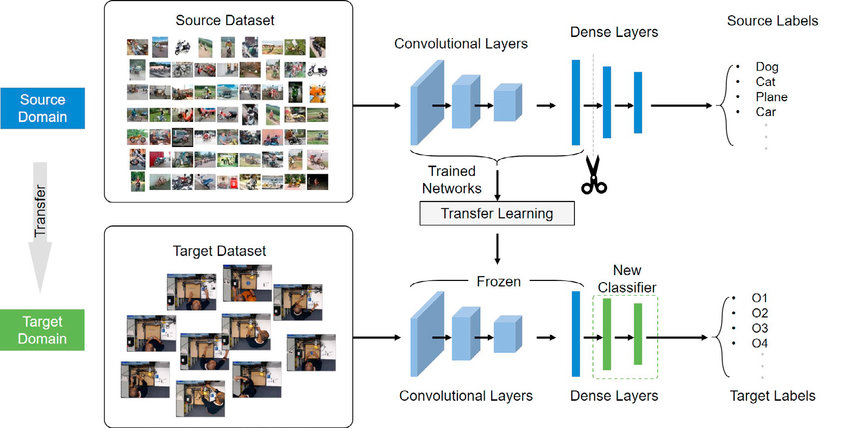

In [13]:
display(Image(filename="Transfer Learning.png"))

In [14]:
# Image-net, VGG, Resnet
# backbone, inferance (2 giai đoạn chính trong transfer-learning)
# transfer learning: giống như chạy tiếp sức, giảm time, cắt bỏ 2 lớp dense
# drop-back: đạo hàm

In [15]:
input_path = path + "/Object Dataset 1"
os.path.isdir(input_path)

True

In [19]:
# test
for x in os.walk(root):
    print(x[0])

Object Dataset 1
Object Dataset 1/train
Object Dataset 1/train/dogs
Object Dataset 1/train/cats
Object Dataset 1/train/humans
Object Dataset 1/train/horses
Object Dataset 1/validation
Object Dataset 1/validation/dogs
Object Dataset 1/validation/cats
Object Dataset 1/validation/humans
Object Dataset 1/validation/horses


In [20]:
root = "Object Dataset 1"
# lặp qua thư mục con (os.walk)
categories = [x[0] for x in os.walk(root)]
categories

['Object Dataset 1',
 'Object Dataset 1/train',
 'Object Dataset 1/train/dogs',
 'Object Dataset 1/train/cats',
 'Object Dataset 1/train/humans',
 'Object Dataset 1/train/horses',
 'Object Dataset 1/validation',
 'Object Dataset 1/validation/dogs',
 'Object Dataset 1/validation/cats',
 'Object Dataset 1/validation/humans',
 'Object Dataset 1/validation/horses']

In [29]:
from PIL import Image
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Model, layers
from tensorflow.keras.models import load_model, model_from_json
import tensorflow as tf
import PIL

In [22]:
# với bài toán classification phải fix kích thước ảnh đầu vào
# setting
batch_size = 32
img_height = 224
img_width = 224

In [23]:
root = "Object Dataset 1/"

# tạo data
train_datagen = ImageDataGenerator(
    shear_range=10, # kéo dãn image
    zoom_range=0.2,
    horizontal_flip=True, # lật ngang
    # tiền xữ lý theo thuật toán đầu vào
    preprocessing_function=preprocess_input
)

train_dataset = train_datagen.flow_from_directory(
    directory=root + "train",
    batch_size=batch_size,
    shuffle=True,
    target_size = (img_width, img_height),
    # kết quả đầu ra sẽ là vector xác suất
    class_mode= "categorical"
)


valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

valid_dataset = valid_datagen.flow_from_directory(
    directory=root + "validation",
    batch_size=batch_size,
    shuffle=True,
    target_size = (img_width, img_height),
    # kết quả đầu ra sẽ là vector xác suất
    class_mode= "categorical"
)

Found 688 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [24]:
root = "Object Dataset 2"
# lặp qua thư mục con (os.walk)
categories = [x[0] for x in os.walk(root)]
categories

['Object Dataset 2',
 'Object Dataset 2/airplanes',
 'Object Dataset 2/helicopter',
 'Object Dataset 2/ketch']

In [25]:
root = "Object Dataset 2/"

# tạo data
train_datagen = ImageDataGenerator(
    shear_range=10, # kéo dãn image
    zoom_range=0.2,
    horizontal_flip=True, # lật ngang
    validation_split=0.2,
    # tiền xữ lý theo thuật toán đầu vào
    preprocessing_function=preprocess_input
)

train_dataset_2 = train_datagen.flow_from_directory(
    directory=root,
    batch_size=batch_size,
    shuffle=True,
    target_size = (img_width, img_height),
    subset="training", # 80%
    # kết quả đầu ra sẽ là vector xác suất
    class_mode= "categorical"
)


valid_datagen = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input
)

valid_dataset_2 = valid_datagen.flow_from_directory(
    directory=root,
    batch_size=batch_size,
    shuffle=True,
    target_size = (img_width, img_height),
    subset="validation", # 20%
    # kết quả đầu ra sẽ là vector xác suất
    class_mode= "categorical"
)

Found 255 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


In [27]:
# resnet network
class_dict = train_dataset.class_indices
class_name = list(class_dict.keys())
print(class_name)

['cats', 'dogs', 'horses', 'humans']


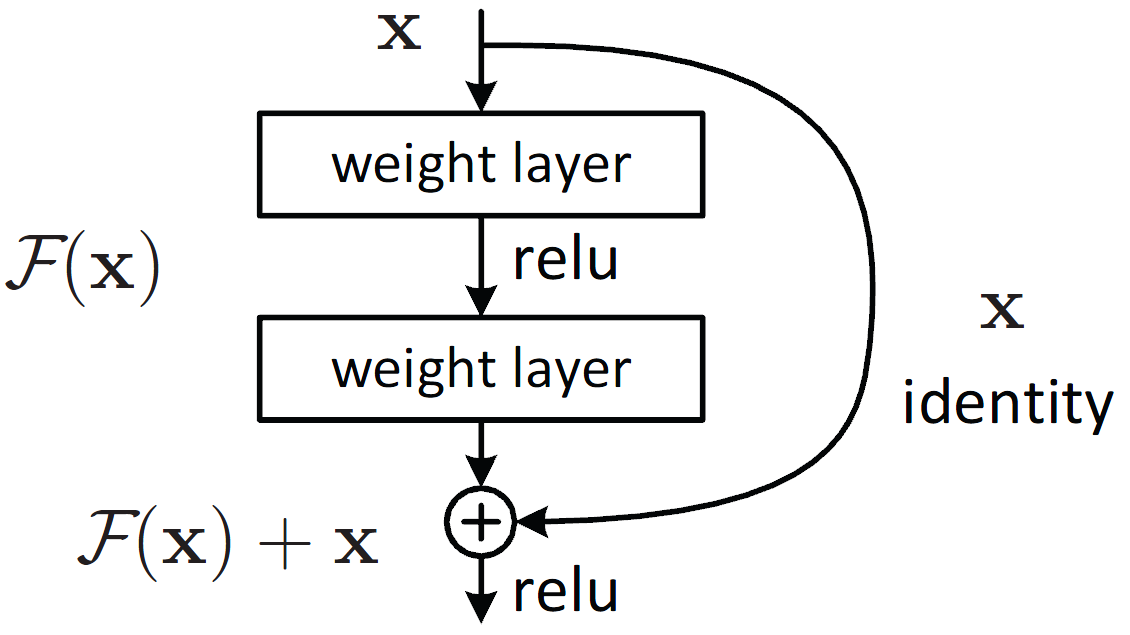

In [32]:
from IPython.display import display, Image 
display(Image(filename="Resnet.png"))

In [33]:
# convnet - vector - flatten - network
# convnet cần phải qua rất nhiều bước
# Resnet: Input X -> weight layer (convnet) -> + (X input + với matrix convnet, giúp không ảnh hưởng gradient)
# vanishing gradient: Biến mất dần
# resnet cho phép nhiều layer mà không bị mất thông tin

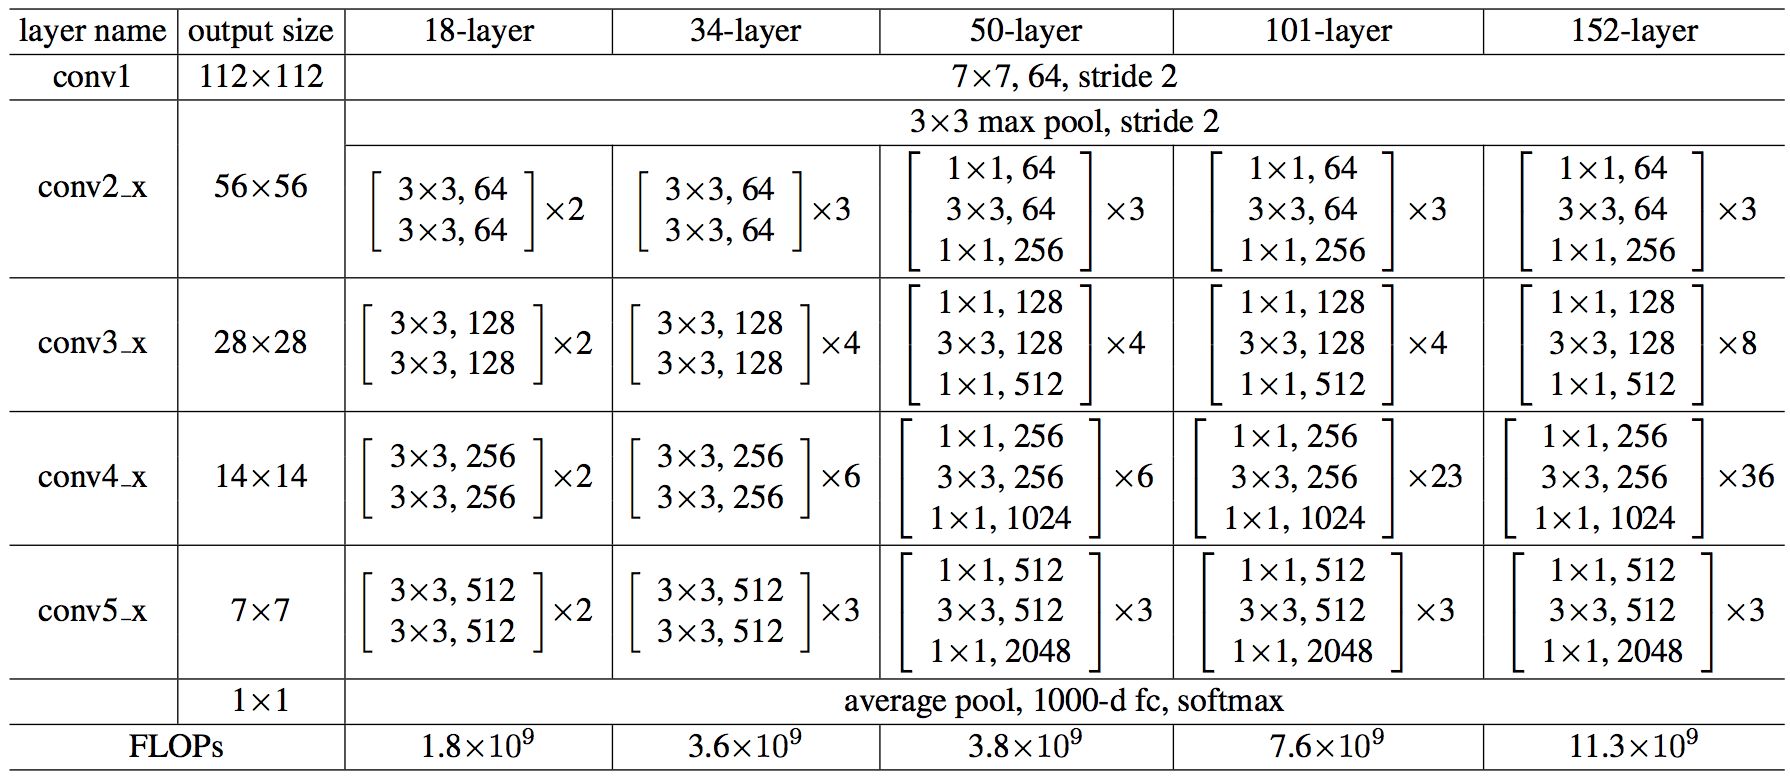

In [34]:
display(Image(filename="Resnet 02.png"))

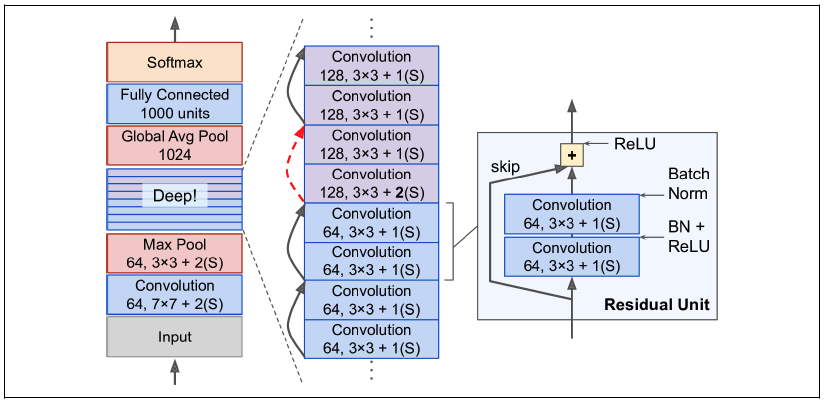

In [35]:
display(Image(filename="Resnet 03.png"))

In [36]:
# built resnet
conv_base = ResNet50(
    include_top=False, # chỉ lấy phía trước vì dùng kiến trúc transfer learning
    weights= "imagenet"
)

for layer in conv_base.layers:
    # không train lại weight của 50 layer trên
    layer.trainable = False

Metal device set to: Apple M1


2023-04-14 14:04:39.060170: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-14 14:04:39.060370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


94765736/94765736 [==============================] - 11s 0us/step


In [37]:
x = conv_base.output
# Đi qua mạng inferance
x = layers.GlobalAveragePooling2D()(x)
# x trên có dense = 2048
x = layers.Dense(128, activation="relu")(x)

# trả về xác suất của 4 object
predictions = layers.Dense(len(class_name), activation="softmax")(x)
# vì tổng xác suất trên sẽ không bằng 1 nên cần phải đưa về probability-space (softmax) sẽ có tổng bằng 1

# define model
# backbone
model = Model(conv_base.input, predictions)

In [38]:
# xác định orther object
# dùng threshold thì data cần phải đủ nhiều và phải đặt trước softmax
# hoặc phân tích background > threshold

In [58]:
# categorical_crossentropy: -ylogy(p)   (xác suất có thuộc lớp đó hay không)
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [60]:
# train
history = model.fit(train_dataset, 
                    steps_per_epoch=train_dataset.samples // batch_size,
                    epochs=10,
                    validation_data=valid_dataset,
                    validation_steps=valid_dataset.samples // batch_size
                   )

Epoch 1/10


2023-04-14 15:29:09.574331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9909

2023-04-14 15:29:18.988382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 12s 413ms/step - loss: 0.0230 - accuracy: 0.9909 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 2/10
21/21 [==============================] - 8s 383ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0352 - val_accuracy: 0.9896
Epoch 3/10
21/21 [==============================] - 8s 376ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.0563 - val_accuracy: 0.9896
Epoch 4/10
21/21 [==============================] - 8s 384ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.1088 - val_accuracy: 0.9896
Epoch 5/10
21/21 [==============================] - 8s 385ms/step - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 8s 377ms/step - loss: 0.0034 - accuracy: 0.9985 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 8s 376ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 8/10
21/21

In [45]:
# save 
# model.save_weights('Object_Classification_1.h5')

In [46]:
model.load_weights('Object_Classification_1.h5')

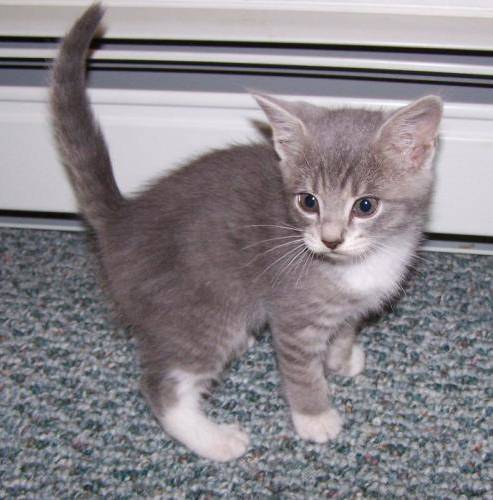

In [47]:
# test
from keras.preprocessing import image
root = 'Object Dataset 1/'
img_path = root + "validation/cats/cat.173.jpg"
PIL.Image.open(img_path)

In [65]:
import keras.utils as image
img = tf.keras.utils.load_img(img_path, target_size = (img_height, img_width))

# (224, 224, 3)
x = image.img_to_array(img)

# (32, 224, 224, 3): train
# (1, 224, 224, 3): 1 image vì là test
x = np.expand_dims(x, axis=0)

# chuẩn hóa
x = preprocess_input(x)

predictions = model.predict(x)
score = np.round(tf.nn.softmax(predictions[0]), 5)

print(class_name)
print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

2023-04-14 15:45:37.391010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
['cats', 'dogs', 'horses', 'humans']
[0.47537 0.17488 0.17488 0.17488]
This image most likely belongs to cats with a 47.54 percent confidence.


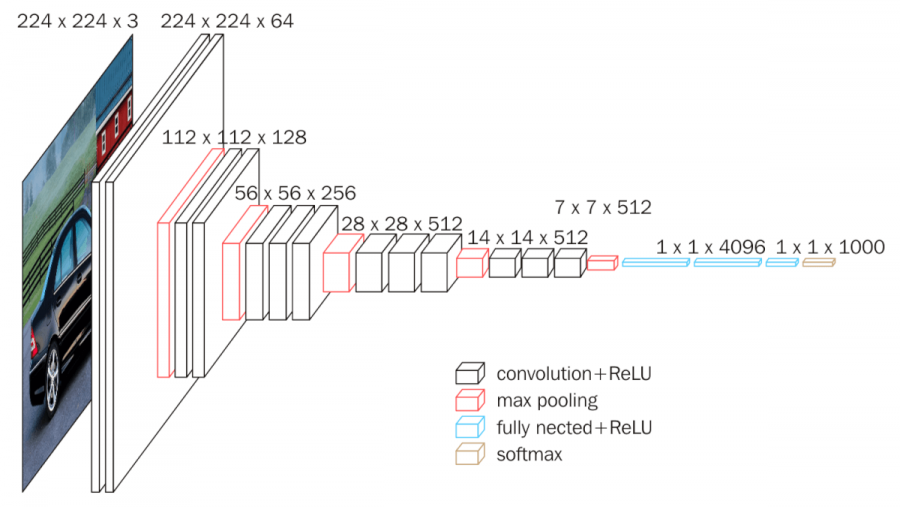

In [66]:
display(Image(filename="VGG16.png"))

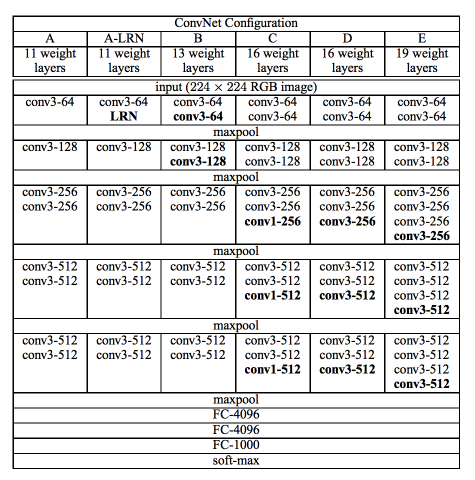

In [67]:
# VGG khác Resnet là chập 3-4-4-4-1
# phân tích đặt trưng rõ nhất có thể bằng nhiều lần convolution liên tiếp sau đó mới max-pooling
# đạo hàm ngược để update weights (dễ bị đạo hàm bằng 0 nếu nhiều layer > 19)

display(Image(filename="VGG16 02.png"))

In [68]:
from tensorflow.keras.applications import vgg16

# define VGG16
conv_base = vgg16.VGG16(
    include_top = False,
    weights = "imagenet"
)

for layer in conv_base.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 7s 0us/step


In [69]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
predictions = layers.Dense(3, activation="softmax")(x)
model2 = Model(conv_base.input, predictions)

model2.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [70]:
# VGG
history = model2.fit(
    train_dataset_2,
    steps_per_epoch = train_dataset_2.samples // batch_size,
    epochs=10,
    validation_data=valid_dataset_2,
    validation_steps= valid_dataset_2.samples // batch_size
)

Epoch 1/10


2023-04-14 16:26:28.082094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 2.2691 - accuracy: 0.5426

2023-04-14 16:26:33.505026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 6s 808ms/step - loss: 2.2691 - accuracy: 0.5426 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 5s 684ms/step - loss: 0.1813 - accuracy: 0.9283 - val_loss: 0.0591 - val_accuracy: 0.9688
Epoch 3/10
7/7 [==============================] - 5s 701ms/step - loss: 0.0249 - accuracy: 0.9955 - val_loss: 0.1333 - val_accuracy: 0.9375
Epoch 4/10
7/7 [==============================] - 5s 687ms/step - loss: 0.0228 - accuracy: 0.9955 - val_loss: 0.0794 - val_accuracy: 0.9688
Epoch 5/10
7/7 [==============================] - 5s 679ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 5s 678ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 9.4688e-04 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 5s 680ms/step - loss: 0.0093 - accuracy: 0.9955 - val_loss: 1.8185e-04 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=======

In [71]:
model2.load_weights("Object_Classification_2.h5")

In [72]:
class_dict2 = train_dataset_2.class_indices
class_name2 = list(class_dict2.keys())
print(class_dict2)
print(class_name2)

{'airplanes': 0, 'helicopter': 1, 'ketch': 2}
['airplanes', 'helicopter', 'ketch']


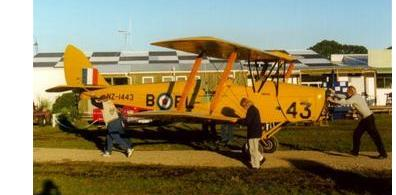

In [73]:
# test
root = "Object Dataset 2/"
img_path = root + "airplanes/image_0045.jpg"
PIL.Image.open(img_path)

In [76]:
img = tf.keras.utils.load_img(img_path, target_size = (img_height, img_width))

# (224, 224, 3)
x = image.img_to_array(img)

# (32, 224, 224, 3): train
# (1, 224, 224, 3): 1 image vì là test
x = np.expand_dims(x, axis=0)

# chuẩn hóa
x = preprocess_input(x)

predictions = model2.predict(x)
score = np.round(tf.nn.softmax(predictions[0]), 5)

print(class_name2)
print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name2[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 28ms/step
['airplanes', 'helicopter', 'ketch']
[0.57612 0.21194 0.21194]
This image most likely belongs to airplanes with a 57.61 percent confidence.


In [77]:
# 57.61% là có transfer-learning trong đó